## Hello Kagglers,
The aim of this dataset is to showcase how EDA is performed on the housing prediction dataset and how machine learning models can be built using a clean data. 
I have created 3 models (LinearRegression, Ridge, and Lasso) and explained using RMSE as a metric how well these models perform.  
**Note: I have written my observations and the code is heavily commented so that, it would be easier for anybody who is willing to understand the logic.**

The steps involved in model building are as follows,
- Understanding Data
- Fixing datatypes
- Data Cleanup
    - Removing unwanted features which doesn't contribute to prediction
    - Handle missing values in both column and row level
    - Outlier treatment
- Exploratory Data Analysis (EDA)
- Scaling
- Model Building
- Testing the model on final test dataset (Public score obtained for Lasso model is 0.1454) 

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

import warnings
from IPython.display import Markdown, display
# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# Display markdown. This function is called when we have to display the observations programatically.
def printmd(string):
    display(Markdown('**Observations:** ' + string))

### Importing dataset

In [3]:
train = pd.read_csv('train-2.csv')
test = pd.read_csv('test.csv')

In [4]:
# Combining training and testing datasets since the data cleanup is same for both datasets.
# This step avoids performing the same steps on test set again.
data = pd.concat([train, test], keys=('x', 'y'))

In [5]:
# display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_info_columns', data.shape[1])

### Understanding Data

In [6]:
printmd('There are {} observations and {} features in the dataset.'.format(*data.shape))

**Observations:** There are 2919 observations and 81 features in the dataset.

In [7]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
x 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
  1   2          20       RL         80.0     9600   Pave   NaN      Reg   
  2   3          60       RL         68.0    11250   Pave   NaN      IR1   
  3   4          70       RL         60.0     9550   Pave   NaN      IR1   
  4   5          60       RL         84.0    14260   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
x 0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
  1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
  2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
  3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
  4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
x 0       Norm     1Fam     2Story            7            5       2003   
  1       Norm     1Fam     1Story            6            8       1976   
  2       Norm     1Fam     2Story            7            5       2001   
  3       Norm     1Fam     2Story            7            5       1915   
  4       Norm     1Fam     2Story            8            5       2000   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
x 0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
  1          1976     Gable  CompShg     MetalSd     MetalSd       None   
  2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
  3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
  4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
x 0       196.0        Gd        TA      PConc       Gd       TA           No   
  1         0.0        TA        TA     CBlock       Gd       TA           Gd   
  2       162.0        Gd        TA      PConc       Gd       TA           Mn   
  3         0.0        TA        TA     BrkTil       TA       Gd           No   
  4       350.0        Gd        TA      PConc       Gd       TA           Av   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
x 0          GLQ       706.0          Unf         0.0      150.0        856.0   
  1          ALQ       978.0          Unf         0.0      284.0       1262.0   
  2          GLQ       486.0          Unf         0.0      434.0        920.0   
  3          ALQ       216.0          Unf         0.0      540.0        756.0   
  4          GLQ       655.0          Unf         0.0      490.0       1145.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
x 0    GasA        Ex          Y      SBrkr       856       854             0   
  1    GasA        Ex          Y      SBrkr      1262         0             0   
  2    GasA        Ex          Y      SBrkr       920       866             0   
  3    GasA        Gd          Y      SBrkr       961       756             0   
  4    GasA        Ex          Y      SBrkr      1145      1053             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
x 0       1710           1.0           0.0         2         1             3   
  1       1262           0.0           1.0         2         0             3   
  2       1786           1.0           0.0         2         1             3   
  3       1717           1.0           0.0         1         0             3   
  4       2198           1.0           0.0         2         1             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
x 0             1          Gd             8        Typ           0   
  1             1          TA             6        Typ           1   
  2             1          Gd             6        Typ 

In [8]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


**Observations:**
- We will look into the outliers while analysing data.
- Scaling is required before building a model as many of the features lie on different scale.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, ('x', 0) to ('y', 1458)
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  

**Observations:** Few of the columns have missing values which has to be imputed if required and few of the columns have to be removed since the amount of missing values is huge.

### Fixing datatypes

In [10]:
# Check number of unique values in all columns to identify which columns has to be converted to categorical type.
unique_vals = []
dtypes = []
for col in data.columns:
    unique_vals.append(len(data[col].unique()))
    dtypes.append(data[col].dtype)
df = pd.DataFrame({
    'Column': data.columns,
    'Unique_Count': unique_vals,
    'Data Type': dtypes
})
# View all the observations of this dataframe.
pd.set_option('display.max_rows', data.shape[1])
print(df.sort_values('Unique_Count'))
pd.set_option('display.max_rows', 50)

           Column  Unique_Count Data Type
41     CentralAir             2    object
5          Street             2    object
50       HalfBath             3     int64
65     PavedDrive             3    object
11      LandSlope             3    object
6           Alley             3    object
9       Utilities             3    object
48   BsmtHalfBath             4   float64
52   KitchenAbvGr             4     int64
72         PoolQC             4    object
7        LotShape             4    object
60   GarageFinish             4    object
8     LandContour             4    object
27      ExterQual             4    object
53    KitchenQual             5    object
28      ExterCond             5    object
49       FullBath             5     int64
56     Fireplaces             5     int64
47   BsmtFullBath             5   float64
73          Fence             5    object
74    MiscFeature             5    object
77         YrSold             5     int64
32   BsmtExposure             5   

In [11]:
# If a column has finite list of unique values, it can be considered as categorical.
category_cols = ['CentralAir', 'Street', 'Utilities', 'PavedDrive', 'Alley', 'BsmtHalfBath', 'HalfBath', 'LandSlope', 
                 'FullBath', 'GarageFinish', 'Fireplaces', 'LotShape', 'KitchenQual', 'KitchenAbvGr', 'PoolQC', 'LandContour',
                 'ExterQual', 'BsmtFullBath', 'ExterCond', 'BsmtQual', 'HeatingQC', 'GarageCars', 'BsmtExposure', 'MasVnrType',
                 'Fence', 'BldgType', 'MSZoning', 'LotConfig', 'RoofStyle', 'Foundation', 'FireplaceQu', 'SaleCondition', 
                 'GarageType', 'BsmtFinType1', 'BsmtFinType2', 'BedroomAbvGr', 'HouseStyle', 'OverallQual', 'OverallCond',
                 'SaleType', 'Condition1', 'MiscFeature', 'BsmtCond', 'Heating', 'GarageQual', 'Electrical', 'GarageCond', 
                 'Functional', 'Condition2', 'RoofMatl', 'TotRmsAbvGrd', 'MoSold', 'MSSubClass', 'Exterior1st', 'Exterior2nd']
for col in category_cols:
    data[col] = data[col].astype('category')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, ('x', 0) to ('y', 1458)
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             2919 non-null   int64   
 1   MSSubClass     2919 non-null   category
 2   MSZoning       2915 non-null   category
 3   LotFrontage    2433 non-null   float64 
 4   LotArea        2919 non-null   int64   
 5   Street         2919 non-null   category
 6   Alley          198 non-null    category
 7   LotShape       2919 non-null   category
 8   LandContour    2919 non-null   category
 9   Utilities      2917 non-null   category
 10  LotConfig      2919 non-null   category
 11  LandSlope      2919 non-null   category
 12  Neighborhood   2919 non-null   object  
 13  Condition1     2919 non-null   category
 14  Condition2     2919 non-null   category
 15  BldgType       2919 non-null   category
 16  HouseStyle     2919 non-null   category
 17  OverallQual    2919

### Data Cleanup
- Removing unwanted features which doesn't contribute to analysis where,
    - All values of a column are unique
    - Column having only 1 unique value
- Handle missing values in both column and row level
- Outlier treatment

#### Handling missing values

In [13]:
# Check if ALL the column values in any of the rows are empty. If empty, those rows are removed.
data[data.isnull().all(axis=1)]

,,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [14]:
# Check whether ANY of the rows are having missing values > 40%. If found, those rows are removed.
data[100*(data.isnull().sum(axis=1)/data.shape[1]) > 40]

,,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**Observations:** We don't have the rows whose missing values are >40%

In [15]:
def get_missing_val_cols():
    for col in data.columns:
        missing_val_sum = data[col].isnull().sum()
        missing_prcnt = round(100*(missing_val_sum/len(data)), 2)
        if missing_val_sum > 0:
            print('There are {}% missing values in "{}"'.format(missing_prcnt, col))
get_missing_val_cols()

There are 0.14% missing values in "MSZoning"
There are 16.65% missing values in "LotFrontage"
There are 93.22% missing values in "Alley"
There are 0.07% missing values in "Utilities"
There are 0.03% missing values in "Exterior1st"
There are 0.03% missing values in "Exterior2nd"
There are 0.82% missing values in "MasVnrType"
There are 0.79% missing values in "MasVnrArea"
There are 2.77% missing values in "BsmtQual"
There are 2.81% missing values in "BsmtCond"
There are 2.81% missing values in "BsmtExposure"
There are 2.71% missing values in "BsmtFinType1"
There are 0.03% missing values in "BsmtFinSF1"
There are 2.74% missing values in "BsmtFinType2"
There are 0.03% missing values in "BsmtFinSF2"
There are 0.03% missing values in "BsmtUnfSF"
There are 0.03% missing values in "TotalBsmtSF"
There are 0.03% missing values in "Electrical"
There are 0.07% missing values in "BsmtFullBath"
There are 0.07% missing values in "BsmtHalfBath"
There are 0.03% missing values in "KitchenQual"
There are

In [16]:
# Remove columns having missing values > 90% (Alley, PoolQC, MiscFeature). According to data dictionary, the reason 
# for having null values is either because there is no pool or no fence depending on the column.
# But, even if we define the missing values as a new category, it would aquire more than 90% of observations with this category.
# Since one particular category withholds almost majority of the observations, this column might bias our predictions.

cols_to_remove = ['Alley', 'PoolQC', 'MiscFeature']        
printmd("""
  - Number of columns having null values > {0}%: **{1}**
  - List of columns having null values > {0}%: **{2}**
  - Remove these columns since it doesn't contribute much for analysis
""".format(90, len(cols_to_remove), ', '.join(cols_to_remove))
)
data.drop(cols_to_remove, axis=1, inplace=True)

**Observations:** 
  - Number of columns having null values > 90%: **3**
  - List of columns having null values > 90%: **Alley, PoolQC, MiscFeature**
  - Remove these columns since it doesn't contribute much for analysis


In [17]:
# Imputing the missing values for the required columns with "NotBuilt". According to data dictionary, NA is is
# nothing but the structure is not built. Ex: If Garage is NA, it means garage is not built.

cols_to_impute_notbuilt = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
                          'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence']

for col in cols_to_impute_notbuilt:
    if str(data[col].dtypes) == 'category':
        # For categorical data type, the value should be imputed within the existing set of values. So, add "NotBuilt"
        # to the list of categories.
        data[col].cat.add_categories('NotBuilt', inplace=True)
    data[col].fillna('NotBuilt', axis=0, inplace=True)

In [18]:
# Columns which have to be imputed with mode
mode_impute_cols = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional']
for col in mode_impute_cols:
    data[col].fillna(data[col].mode()[0], axis=0, inplace=True)

In [19]:
# When basement/garage is not built, relevant columns which indicates the area of the basement should be imputed with 0.
bsmt_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']
for col in bsmt_cols:
    data[col].fillna(0, axis=0, inplace=True)

In [20]:
# For SaleType, there is a value called "Other". For missing values, we can impute with "Oth".
data.SaleType.fillna('Oth', axis=0, inplace=True)

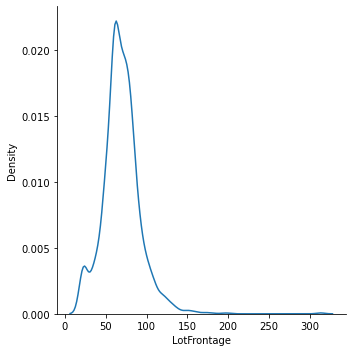

In [21]:
sns.displot(data['LotFrontage'], kind='kde')
plt.show()
# The frequency of distribution is high at 60 for LotFrontage. Hence, impute 60 for all missing values in this column.
data.LotFrontage.fillna(60, inplace=True)

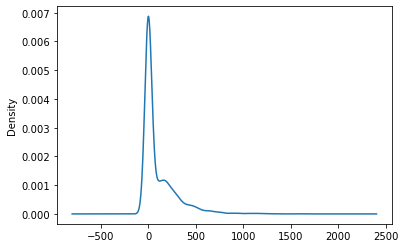

In [22]:
data.MasVnrArea.plot(kind='kde')
plt.show()
# The frequency of distribution is high at 0 for MasVnrArea. Hence, impute 0 for all missing values in this column.
data.MasVnrArea.fillna(0, inplace=True)

In [23]:
# According to data dictionary, there's no value mentioned why the "Electrical" column has NA values.
# Since there are only 0.07% of missing values for this column, impute this column with it's mode.
data.Electrical.fillna(data.Electrical.mode()[0], axis=0, inplace=True)

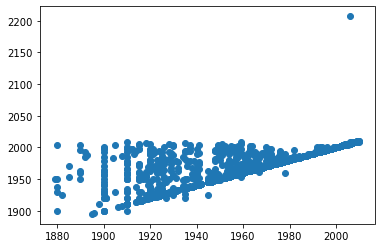

Correlation between garage built year and house built year is: 0.83


In [24]:
plt.scatter(data.YearBuilt, data.GarageYrBlt)
plt.show()
print("Correlation between garage built year and house built year is:", round(data.GarageYrBlt.corr(data.YearBuilt), 2))

In [25]:
# Missing values in garage built year column is due to the fact that, garage is not built and so the missing values.
# Imputing 0 indicating not built, could make it as an outlier since the built date in data lies in 19th and 20th century.
# Reasonable approach is to impute the garage built year with the house built year so that even if we consider the age of the
# house, the selling price might not vary since both house and the garage is considered built at the same year.
# From the scatter plot, it's clear that, the garage is built on or after the house is built which makes sense.

def fill_garage_yr(garageYr, builtYr):
    if pd.isnull(garageYr):
        return builtYr
    else:
        return garageYr
data['GarageYrBlt'] = data.apply(
    lambda row: fill_garage_yr(row.GarageYrBlt, row.YearBuilt),
    axis=1
)

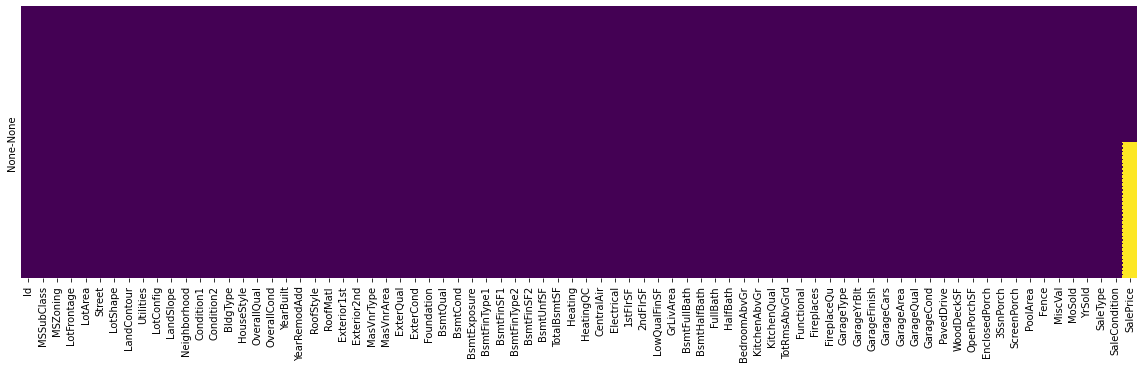

In [26]:
# The missing values for all the independent variables are handled.
plt.figure(figsize=(20,5))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [27]:
printmd('There are {} observations and {} features left after the missing value treatment.'.format(*data.shape))

**Observations:** There are 2919 observations and 78 features left after the missing value treatment.

#### Remove columns which doesn't add value to analysis and prediction

In [28]:
cat_cols = data.select_dtypes(include=['object', 'category']).columns
cols_to_remove = []
for col in cat_cols:
    unique_vals_per_col = len(data[col].unique())
    most_repeated_prcnt = round(100*data[col].value_counts()[0]/len(data))
    print('There are "{}" unique values in "{}" of which the most repeated value is present in "{}"% of the total data.'
         .format(unique_vals_per_col, col, most_repeated_prcnt))
    if most_repeated_prcnt >= 90:
        cols_to_remove.append(col)
        
# For few categorical columns, the most repeated value alone is higher when compared to all other category levels added together.
# In other words, there is no variance for these features.
# Henceforth, these columns won't add value to our predictions and are removed.
data.drop(cols_to_remove, axis=1, inplace=True)

There are "16" unique values in "MSSubClass" of which the most repeated value is present in "37"% of the total data.
There are "5" unique values in "MSZoning" of which the most repeated value is present in "78"% of the total data.
There are "2" unique values in "Street" of which the most repeated value is present in "100"% of the total data.
There are "4" unique values in "LotShape" of which the most repeated value is present in "64"% of the total data.
There are "4" unique values in "LandContour" of which the most repeated value is present in "90"% of the total data.
There are "2" unique values in "Utilities" of which the most repeated value is present in "100"% of the total data.
There are "5" unique values in "LotConfig" of which the most repeated value is present in "73"% of the total data.
There are "3" unique values in "LandSlope" of which the most repeated value is present in "95"% of the total data.
There are "25" unique values in "Neighborhood" of which the most repeated value

In [29]:
printmd("There are {} features left after removing columns which doesn't add value for analysis.".format(data.shape[1]))

**Observations:** There are 64 features left after removing columns which doesn't add value for analysis.

### Outlier Treatment

In [30]:
data.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 1])

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,67.756423,10168.114080,1971.312778,1984.264474,101.396026,441.272011,49.565262,560.579993,1051.417266,1159.581706,336.483727,4.694416,1500.759849,1976.253854,472.712573,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,2007.792737,180921.195890
std,842.787043,21.592540,7886.996359,30.291442,20.894344,178.854579,455.606014,169.179104,439.590889,441.120498,392.362079,428.701456,46.396825,506.051045,27.040351,215.535686,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,1.314964,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
10%,292.800000,47.000000,4922.400000,1924.000000,1950.000000,0.000000,0.000000,0.000000,55.800000,600.000000,744.800000,0.000000,0.000000,923.800000,1939.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,106475.000000
25%,730.500000,60.000000,7478.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,1958.500000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,1460.000000,63.000000,9453.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,467.000000,989.000000,1082.000000,0.000000,0.000000,1444.000000,1978.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,2189.500000,78.000000,11570.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,805.000000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,2001.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
90%,2627.200000,91.000000,14300.600000,2006.000000,2006.200000,322.200000,1056.600000,125.400000,1212.400000,1614.000000,1675.000000,925.000000,0.000000,2153.200000,2006.000000,758.000000,257.000000,131.200000,112.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,278000.000000
100%,2919.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,2207.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,2010.000000,755000.000000


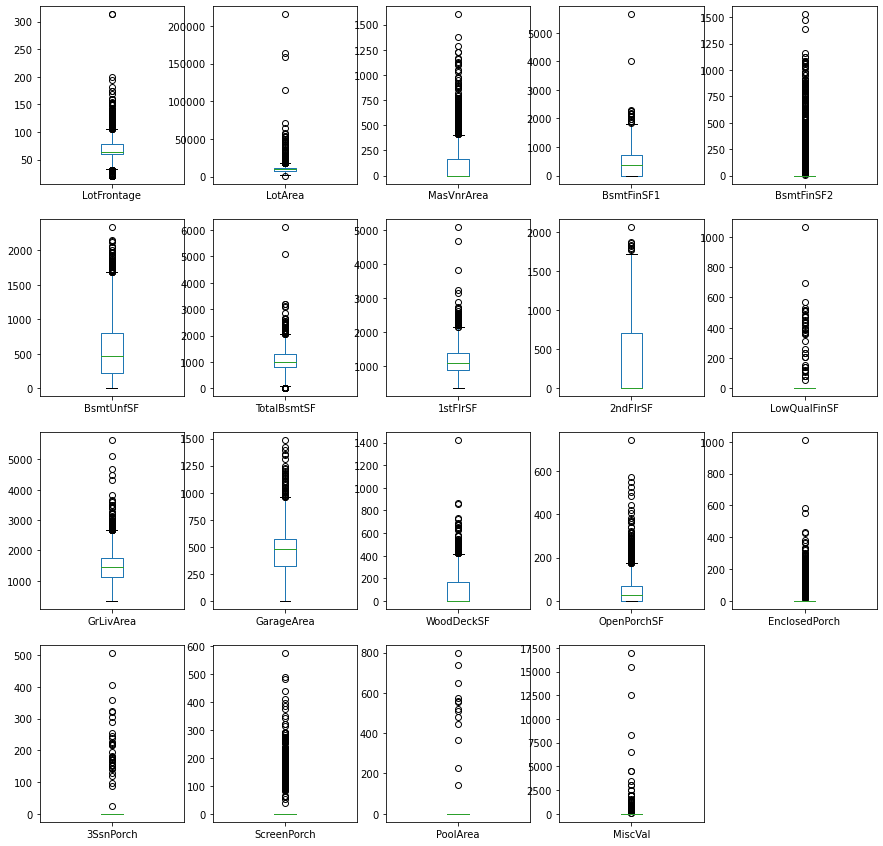

In [31]:
# Define a function which creates box plots for all the numeric columns
def num_col_box_plot(df=data):
    num_data = df.select_dtypes(include='number')
    num_cols_per_row = 5
    num_rows = int(np.ceil(len(num_data.columns)/num_cols_per_row))
    fig_num = 0
    plt.figure(figsize=(15,15))
    for col in num_data:
        fig_num += 1
        plt.subplot(num_rows, num_cols_per_row, fig_num)
        num_data[col].plot.box()
    plt.show()
    
num_col_box_plot(data.drop(['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'SalePrice'], axis=1))

In [32]:
# Check the percentage of data present between 5th and 95th percentiles respectively.
num_data = data.select_dtypes(include='number')
lower_prcntle = 5
upper_prcntle = 100 - lower_prcntle
for num_col in num_data.columns:
    obs_within_lmts = data[(data[num_col] > data[num_col].quantile(lower_prcntle/100)) & 
                              (data[num_col] < data[num_col].quantile(upper_prcntle/100))]
    print('There are {}% of observations between {}th percentile and {}th percentile for the column {}.'
          .format(round(100*obs_within_lmts.shape[0]/data.shape[0], 2), lower_prcntle, upper_prcntle, num_col))

There are 90.0% of observations between 5th percentile and 95th percentile for the column Id.
There are 89.38% of observations between 5th percentile and 95th percentile for the column LotFrontage.
There are 89.96% of observations between 5th percentile and 95th percentile for the column LotArea.
There are 88.56% of observations between 5th percentile and 95th percentile for the column YearBuilt.
There are 77.63% of observations between 5th percentile and 95th percentile for the column YearRemodAdd.
There are 34.6% of observations between 5th percentile and 95th percentile for the column MasVnrArea.
There are 63.07% of observations between 5th percentile and 95th percentile for the column BsmtFinSF1.
There are 6.85% of observations between 5th percentile and 95th percentile for the column BsmtFinSF2.
There are 86.71% of observations between 5th percentile and 95th percentile for the column BsmtUnfSF.
There are 90.0% of observations between 5th percentile and 95th percentile for the col

In [33]:
# There are few columns which could be futile for model building because if we are removing outliers and considering the
# range of data between 5th and 95th percentile, there are hardly any number of observations left.
# The outliers cannot be treated for these columns since the values lie beyond the range mentioned above.
# Henceforth, drop these columns.
data.drop(['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

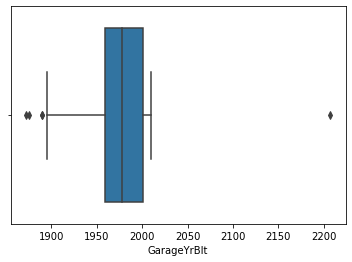

In [34]:
# Check outliers for garage year built.
sns.boxplot(data.GarageYrBlt)
plt.show()

In [35]:
# Having a value > current year is clearly an outlier. Use "YearBuilt" variable and impute the values for these outlier(s).
data.GarageYrBlt = data.apply(
    lambda row: row.YearBuilt if row.GarageYrBlt > 2021 else row.GarageYrBlt,
    axis=1
)

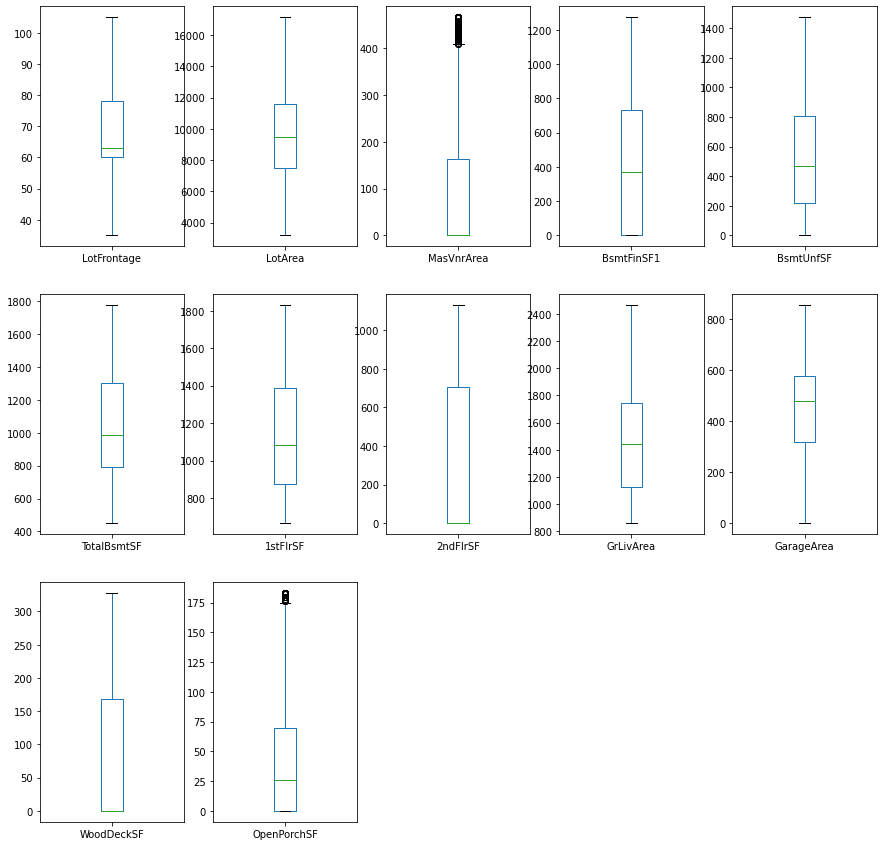

In [36]:
# By using flooring and capping method, for rest of the columns, when the value is less than 5th percentile floor the outliers
# with 5th percentile and when the value is greater than 95th percentile, cap the outliers with 95th percentile respectively.

num_data = data.select_dtypes(include='number')
# We are not treating outliers for date features and the target variable.
num_data.drop(['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'SalePrice'], axis=1, inplace=True)
cols_to_treat_outliers = num_data.columns
def floor_cap_outliers(low, high, val):
    if val < low:
        return low
    elif val > high:
        return high
    else:
        return val

for num_col in cols_to_treat_outliers:
    lower_prnctle_val = num_data[num_col].quantile(lower_prcntle/100)
    upper_prcntle_val = num_data[num_col].quantile(upper_prcntle/100)
    num_data[num_col] = num_data.apply(
        lambda row: floor_cap_outliers(lower_prnctle_val, upper_prcntle_val, row[num_col]),
        axis=1
    )
# Copy the values from numeric dataframe to our original dataframe
data[num_data.columns] = num_data
# Check if all the outliers are handled
num_col_box_plot(num_data)

In [37]:
data.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 1])

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,67.241521,9596.793902,1971.312778,1984.264474,91.212059,427.558753,550.917643,1050.409729,1148.773553,327.004522,1488.222748,1976.184995,467.561014,87.796848,43.907023,2007.792737,180921.195890
std,842.787043,17.135279,3460.541029,30.291442,20.894344,141.820451,412.707961,415.085366,361.947544,335.474668,406.478506,442.946413,26.706411,202.850460,107.839895,54.562033,1.314964,79442.502883
min,1.000000,35.000000,3182.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,450.900000,665.900000,0.000000,861.000000,1872.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
10%,292.800000,47.000000,4922.400000,1924.000000,1950.000000,0.000000,0.000000,55.800000,600.000000,744.800000,0.000000,923.800000,1939.000000,240.000000,0.000000,0.000000,2006.000000,106475.000000
25%,730.500000,60.000000,7478.000000,1953.500000,1965.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,1126.000000,1958.500000,320.000000,0.000000,0.000000,2007.000000,129975.000000
50%,1460.000000,63.000000,9453.000000,1973.000000,1993.000000,0.000000,368.000000,467.000000,989.000000,1082.000000,0.000000,1444.000000,1978.000000,480.000000,0.000000,26.000000,2008.000000,163000.000000
75%,2189.500000,78.000000,11570.000000,2001.000000,2004.000000,163.500000,733.000000,805.000000,1302.000000,1387.500000,704.000000,1743.500000,2001.000000,576.000000,168.000000,70.000000,2009.000000,214000.000000
90%,2627.200000,91.000000,14300.600000,2006.000000,2006.200000,322.200000,1056.600000,1212.400000,1614.000000,1675.000000,925.000000,2153.200000,2006.000000,758.000000,257.000000,131.200000,2010.000000,278000.000000
100%,2919.000000,105.000000,17142.900000,2010.000000,2010.000000,466.000000,1274.000000,1474.600000,1776.100000,1830.100000,1131.200000,2464.200000,2010.000000,856.100000,328.000000,183.100000,2010.000000,755000.000000


In [38]:
printmd('There are {} observations and {} features left after outlier treatment'.format(*data.shape))

**Observations:** There are 2919 observations and 57 features left after outlier treatment

In [39]:
data.head()

Id MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
x 0   1         60       RL         65.0   8450.0      Reg    Inside   
  1   2         20       RL         80.0   9600.0      Reg       FR2   
  2   3         60       RL         68.0  11250.0      IR1    Inside   
  3   4         70       RL         60.0   9550.0      IR1    Corner   
  4   5         60       RL         84.0  14260.0      IR1       FR2   

    Neighborhood Condition1 BldgType HouseStyle OverallQual OverallCond  \
x 0      CollgCr       Norm     1Fam     2Story           7           5   
  1      Veenker      Feedr     1Fam     1Story           6           8   
  2      CollgCr       Norm     1Fam     2Story           7           5   
  3      Crawfor       Norm     1Fam     2Story           7           5   
  4      NoRidge       Norm     1Fam     2Story           8           5   

     YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  \
x 0       2003          2003     Gable     VinylSd     VinylSd    BrkFace   
  1       1976          1976     Gable     MetalSd     MetalSd       None   
  2       2001          2002     Gable     VinylSd     VinylSd    BrkFace   
  3       1915          1970     Gable     Wd Sdng     Wd Shng       None   
  4       2000          2000     Gable     VinylSd     VinylSd    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
x 0       196.0        Gd        TA      PConc       Gd       TA           No   
  1         0.0        TA        TA     CBlock       Gd       TA           Gd   
  2       162.0        Gd        TA      PConc       Gd       TA           Mn   
  3         0.0        TA        TA     BrkTil       TA       Gd           No   
  4       350.0        Gd        TA      PConc       Gd       TA           Av   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF HeatingQC  \
x 0          GLQ       706.0          Unf      150.0        856.0        Ex   
  1          ALQ       978.0          Unf      284.0       1262.0        Ex   
  2          GLQ       486.0          Unf      434.0        920.0        Ex   
  3          ALQ       216.0          Unf      540.0        756.0        Gd   
  4          GLQ       655.0          Unf      490.0       1145.0        Ex   

     1stFlrSF  2ndFlrSF  GrLivArea BsmtFullBath FullBath HalfBath  \
x 0     856.0     854.0     1710.0          1.0        2        1   
  1    1262.0       0.0     1262.0          0.0        2        0   
  2     920.0     866.0     1786.0          1.0        2        1   
  3     961.0     756.0     1717.0          1.0        1        0   
  4    1145.0    1053.0     2198.0          1.0        2        1   

    BedroomAbvGr KitchenQual TotRmsAbvGrd Fireplaces FireplaceQu GarageType  \
x 0            3          Gd            8          0    NotBuilt     Attchd   
  1            3          TA            6          1          TA     Attchd   
  2            3          Gd            6          1          TA     Attchd   
  3            3          Gd            7          1          Gd     Detchd   
  4            4          Gd            9          1          TA     Attchd   

     GarageYrBlt GarageFinish GarageCars  GarageArea GarageQual  WoodDeckSF  \
x 0       2003.0          RFn        2.0       548.0         TA         0.0   
  1       1976.0          RFn        2.0       460.0         TA       298.0   
  2       2001.0          RFn        2.0       608.0         TA         0.0   
  3       1998.0          Unf        3.0       642.0         TA         0.0   
  4       2000.0          RFn        3.0       836.0         TA       192.0   

     OpenPorchSF     Fence MoSold  YrSold SaleType SaleCondition  SalePrice  
x 0         61.0  NotBuilt      2    2008       WD        Normal   208500.0  
  1          0.0  NotBuilt      5    2007       WD        Normal   181500.0  
  2         42.0  NotBuilt      9    2008       WD        Normal   223500.0  
  3         35.0  N

## EDA

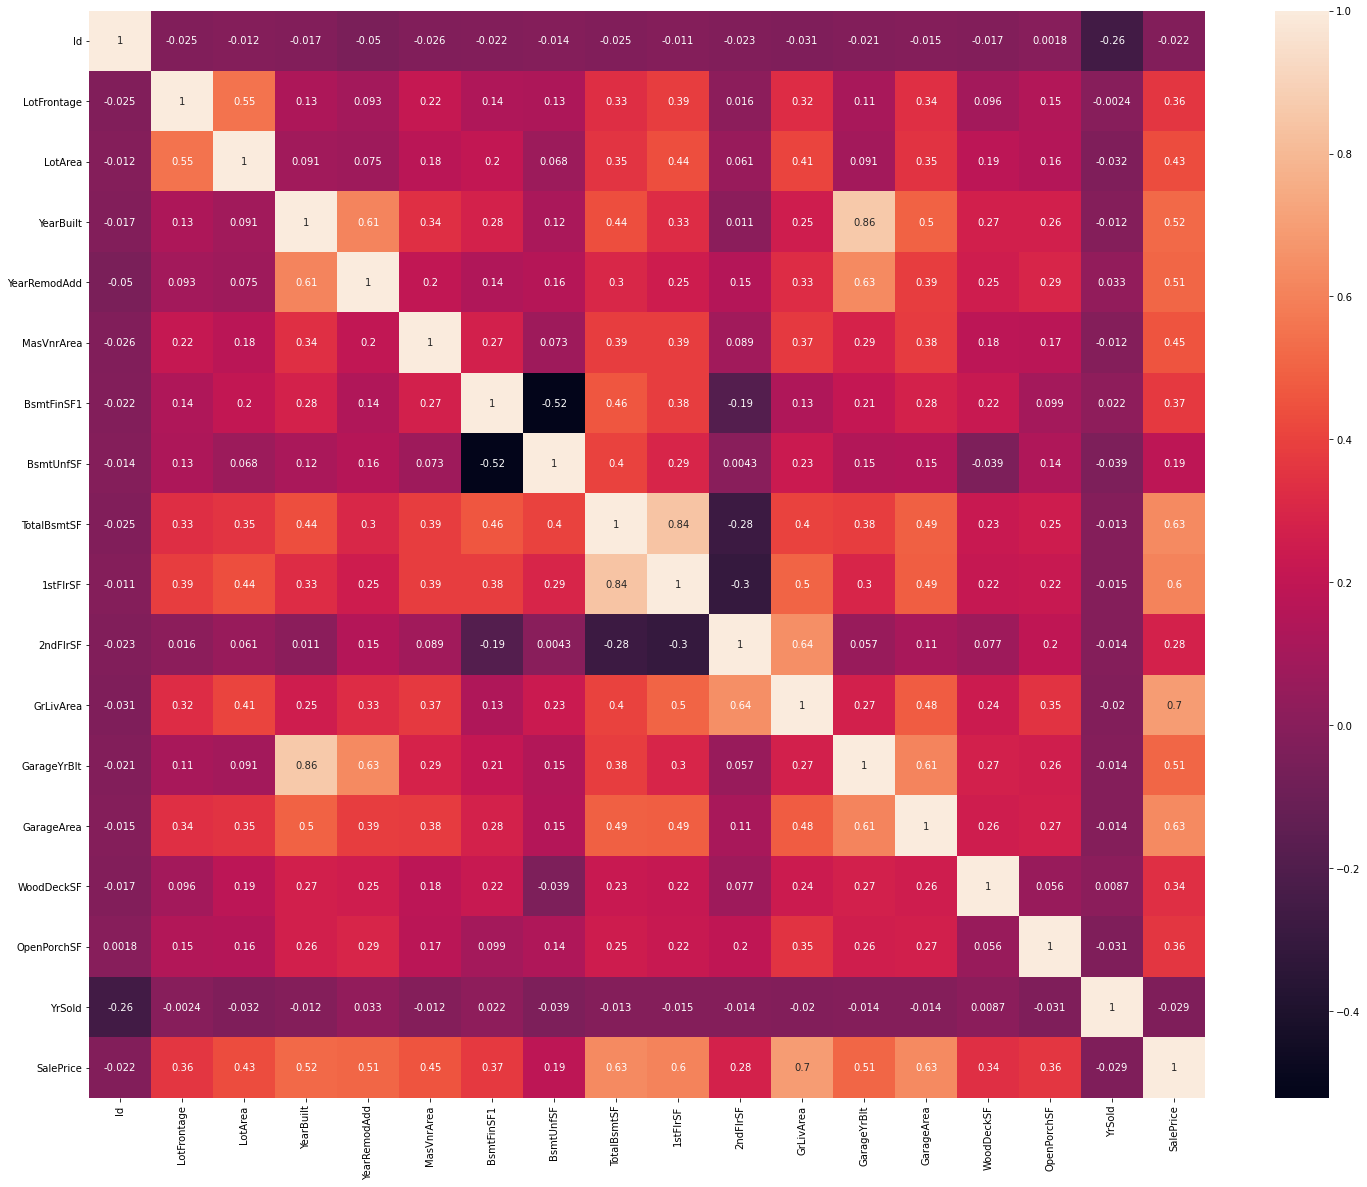

In [40]:
# Plot a heatmap for correlation
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

**Observations:** 
- There is multi-collinearity between independent features.
- Couple of features have stronger correlation with the target variable which includes YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, etc.

<Figure size 360x216 with 0 Axes>

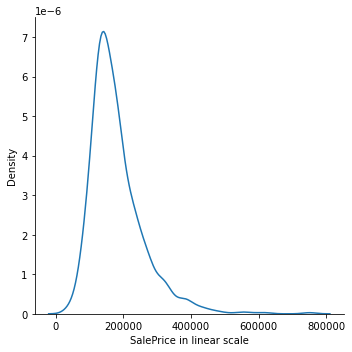

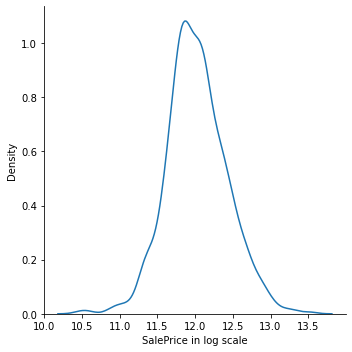

**Observations:** The target variable `SalePrice` is right skewed. We can take log transformation of the target variable to handle skewness.

In [41]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(5,3))
sns.displot(data=data, x='SalePrice', kind='kde')
plt.xlabel('SalePrice in linear scale')
sns.displot(np.log(data['SalePrice']), kind='kde')
plt.xlabel('SalePrice in log scale')
plt.show()
printmd('The target variable `SalePrice` is right skewed. We can take log transformation of the target variable to handle skewness.')

In [42]:
# Taking log transformation for target variable.
data.SalePrice = np.log(data.SalePrice)

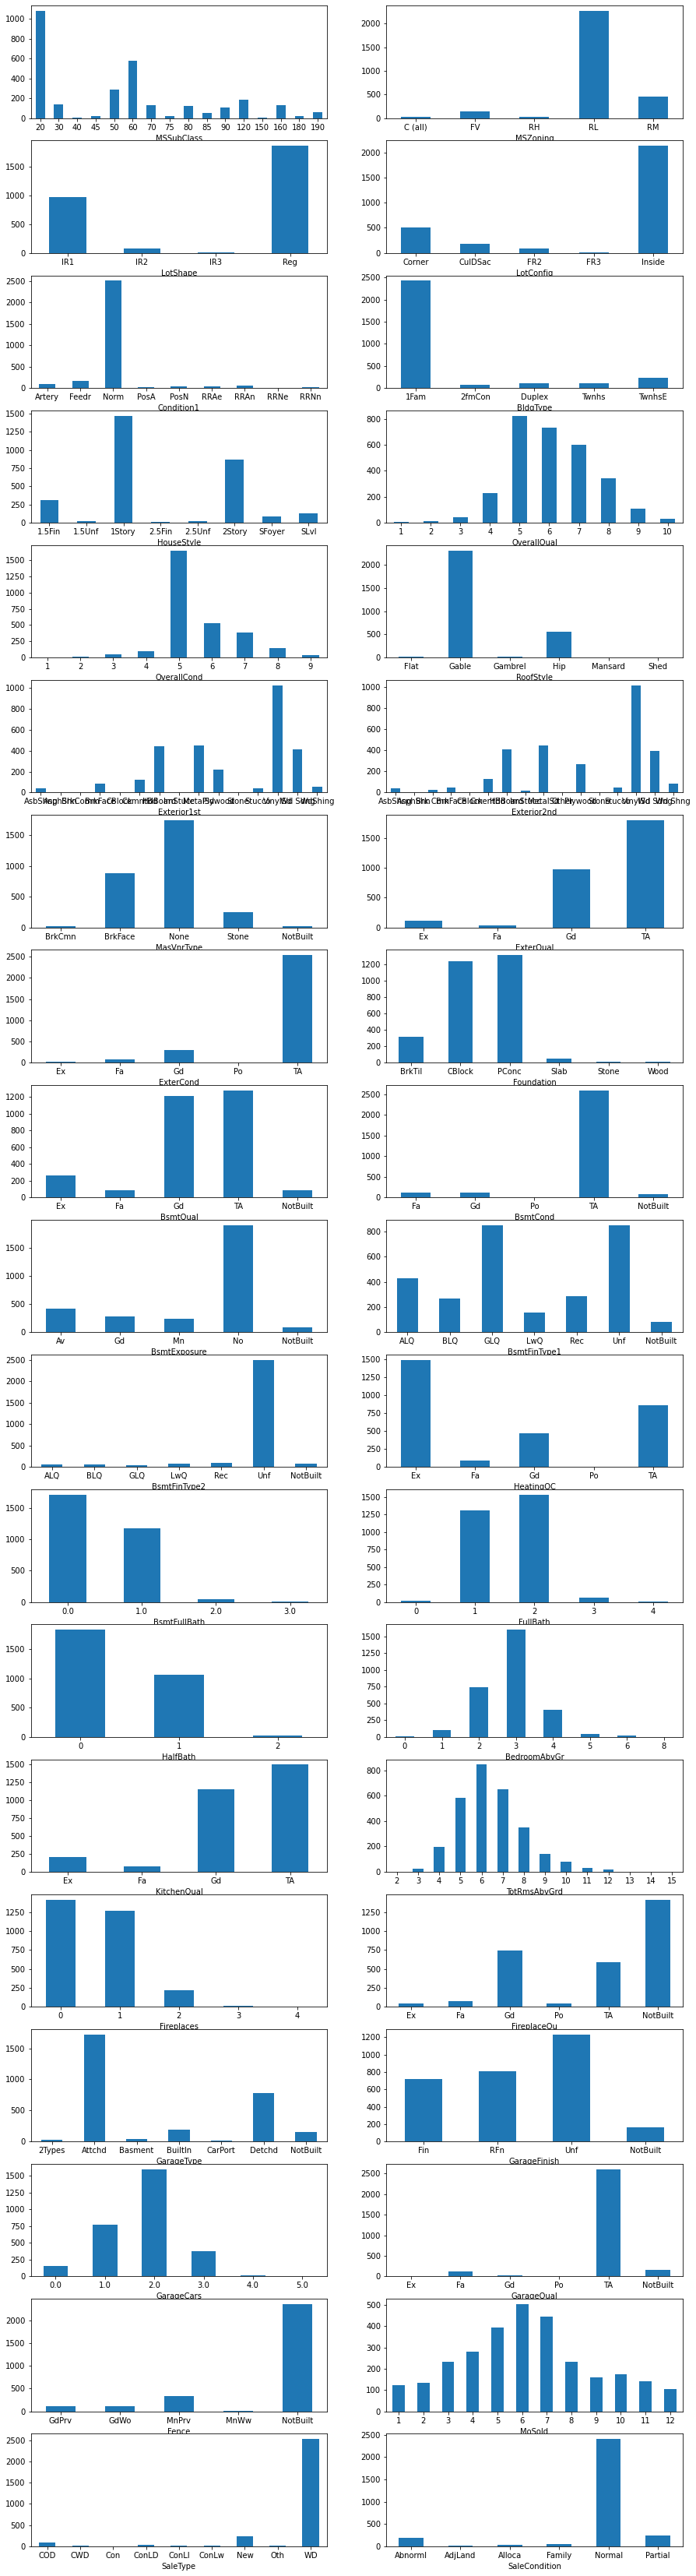

In [43]:
# Univariate analysis of categorical columns
cat_cols = data.select_dtypes(include=['category']).columns
num_cols_per_row = 2
num_rows = int(np.ceil(len(cat_cols)/num_cols_per_row))
fig_num = 0
plt.figure(figsize=(15,60))
for col in cat_cols:
    fig_num += 1
    plt.subplot(num_rows, num_cols_per_row, fig_num)
    data[col].value_counts().sort_index().plot.bar()
    plt.xlabel(col)
    plt.xticks(rotation=0)
plt.show()

**Observations:** Few columns exhibit a pattern while moving along the axis
- `MSZoning`: Residential Low Density (RL) is being sold more frequently.
- `LotShape`: As expected, people will usually go for regular or slightly irregular shape houses. We don't usually buy irregular houses.
- `OverallQual`: If the quality of the house is average or good, people are opting that. If the quality is extremely good, the plot can be really expensive. People are making a trade-off between cost and the quality of the house
- `Foundation`: Cinder Block & Poured Concrete are commonly used type for foundation
- In majority of the features, the frequency of "average" and "good" levels is more when compared to other levels.

### Bivariate Analysis

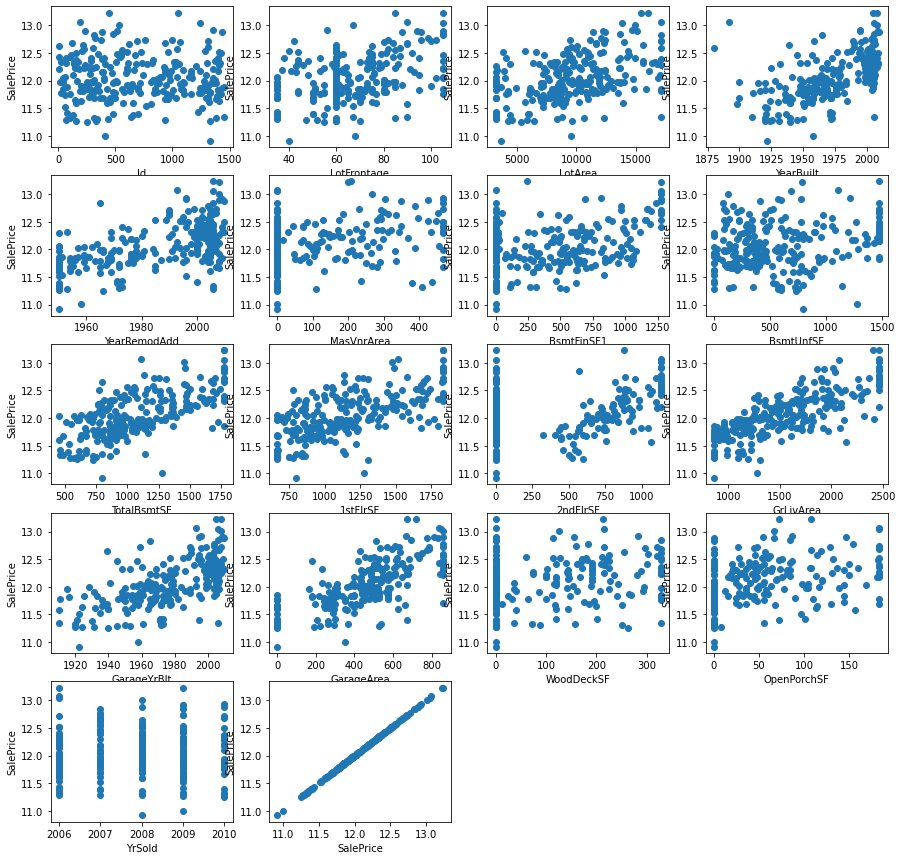

In [44]:
# Analysing numerical columns with the target variable
num_data = data.select_dtypes(include='number').sample(500)
num_cols_per_row = 4
num_rows = int(np.ceil(len(num_data.columns)/num_cols_per_row))
fig_num = 0

plt.figure(figsize=(15,15))
for col in num_data:
    fig_num += 1
    plt.subplot(num_rows, num_cols_per_row, fig_num)
    plt.scatter(num_data[col], num_data['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
plt.show()

**Observations:** When taken a sample of 500 observations and plotted a scatter plot, few features such as "GrLivArea", "TotalBsmtSF" among others are having a linear relationship with target variable.

In [45]:
data.select_dtypes(include=['number'])

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
x 0        1         65.0   8450.0       2003          2003       196.0   
  1        2         80.0   9600.0       1976          1976         0.0   
  2        3         68.0  11250.0       2001          2002       162.0   
  3        4         60.0   9550.0       1915          1970         0.0   
  4        5         84.0  14260.0       2000          2000       350.0   
...      ...          ...      ...        ...           ...         ...   
y 1454  2915         35.0   3182.0       1970          1970         0.0   
  1455  2916         35.0   3182.0       1970          1970         0.0   
  1456  2917        105.0  17142.9       1960          1996         0.0   
  1457  2918         62.0  10441.0       1992          1992         0.0   
  1458  2919         74.0   9627.0       1993          1994        94.0   

        BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
x 0          706.0      150.0        856.0     856.0     854.0     1710.0   
  1          978.0      284.0       1262.0    1262.0       0.0     1262.0   
  2          486.0      434.0        920.0     920.0     866.0     1786.0   
  3          216.0      540.0        756.0     961.0     756.0     1717.0   
  4          655.0      490.0       1145.0    1145.0    1053.0     2198.0   
...            ...        ...          ...       ...       ...        ...   
y 1454         0.0      546.0        546.0     665.9     546.0     1092.0   
  1455       252.0      294.0        546.0     665.9     546.0     1092.0   
  1456      1224.0        0.0       1224.0    1224.0       0.0     1224.0   
  1457       337.0      575.0        912.0     970.0       0.0      970.0   
  1458       758.0      238.0        996.0     996.0    1004.0     2000.0   

        GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  YrSold  SalePrice  
x 0          2003.0       548.0         0.0         61.0    2008  12.247694  
  1          1976.0       460.0       298.0          0.0    2007  12.109011  
  2          2001.0       608.0         0.0         42.0    2008  12.317167  
  3          1998.0       642.0         0.0         35.0    2006  11.849398  
  4          2000.0       836.0       192.0         84.0    2008  12.429216  
...             ...         ...         ...          ...     ...        ...  
y 1454       1970.0         0.0         0.0          0.0    2006        NaN  
  1455       1970.0       286.0         0.0         24.0    2006        NaN  
  1456       1960.0       576.0       328.0          0.0    2006        NaN  
  1457       1992.0         0.0        80.0         32.0    2006        NaN  
  1458       1993.0       650.0       190.0         48.0    2006        NaN  

[2919 rows x 18 columns]

### Derive columns using the numerical columns

In [46]:
# Age of a house, Garage age can be determined by subtracting year sold with respective year.
data['Age'] = data.YrSold - data.YearBuilt
data['AgeSinceRemod'] = data.YrSold - data.YearRemodAdd
data['GarageAge'] = data.YrSold - data.GarageYrBlt
data.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)

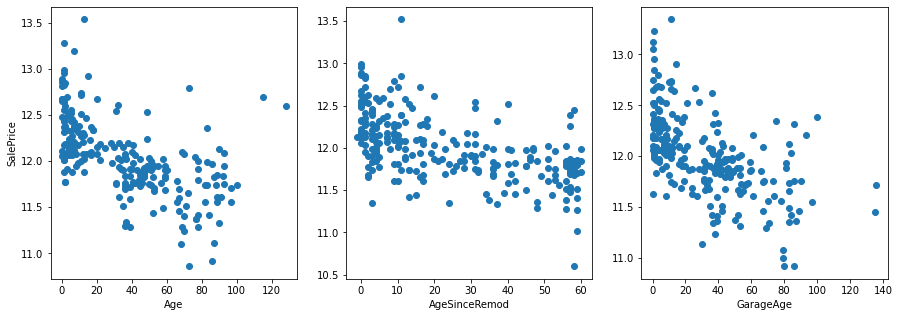

**Observations:** It is clear that as the age of the house increases, the sale price goes down!

In [47]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(data=data.sample(500), x='Age', y='SalePrice')
plt.xlabel('Age')
plt.ylabel('SalePrice')
plt.subplot(132)
plt.scatter(data=data.sample(500), x='AgeSinceRemod', y='SalePrice')
plt.xlabel('AgeSinceRemod')
plt.subplot(133)
plt.scatter(data=data.sample(500), x='GarageAge', y='SalePrice')
plt.xlabel('GarageAge')
plt.show()
printmd("It is clear that as the age of the house increases, the sale price goes down!")

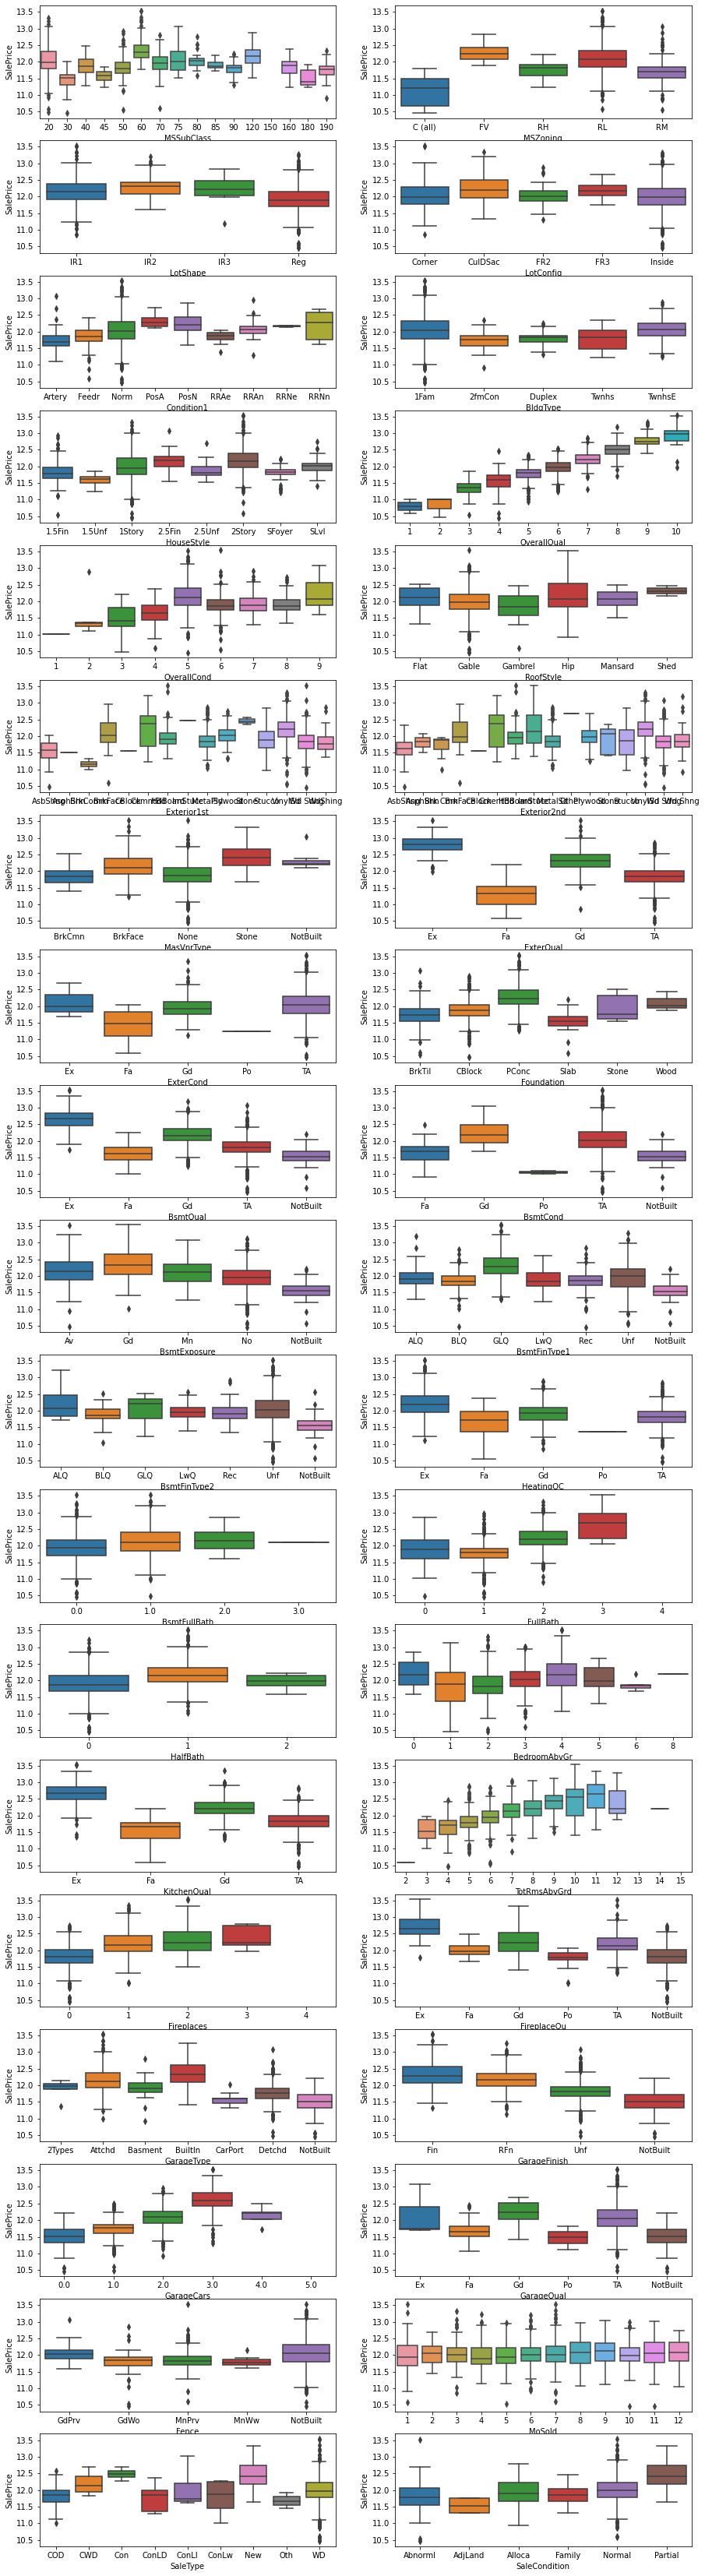

In [48]:
# Analysing categorical columns with the target variable
cat_cols = data.select_dtypes(include=['category']).columns
num_cols_per_row = 2
num_rows = int(np.ceil(len(cat_cols)/num_cols_per_row))
fig_num = 0
plt.figure(figsize=(15,60))
for col in cat_cols:
    fig_num += 1
    plt.subplot(num_rows, num_cols_per_row, fig_num)
    sns.boxplot(data[col], data['SalePrice'])
    plt.xlabel(col)
plt.show()

**Observations:**
- `OverallQual` & `OverallCond`: When the overall quality is good, the sale price goes up! The same holds good for other features which indicates quality.
- `BsmtExposure`: Sale price increases as the exposue of the basement increases.
- `Fireplaces`: As Australia is a cold country, people give importance to fireplaces. More the number of fireplaces, greater the sale price is!
- `MoSold`: Month sold doesn't have much impact on sale price.

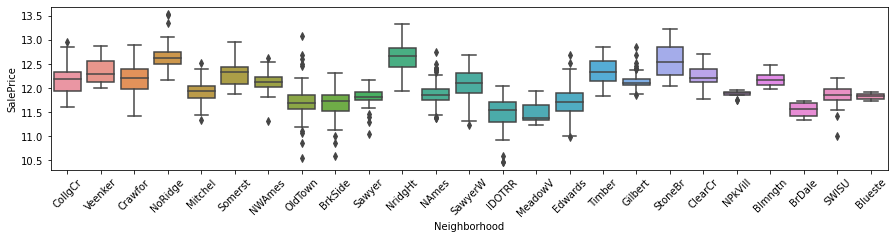

In [49]:
plt.figure(figsize=(15, 3))
sns.boxplot(data['Neighborhood'], data['SalePrice'])
plt.xticks(rotation=45)
plt.show()

### Encoding categorical variables

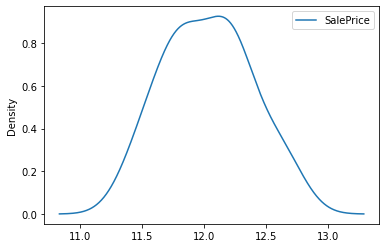

,SalePrice
count,25.000000
mean,12.030073
std,0.347338
min,11.446889
5%,11.489191
50%,12.090689
95%,12.612626
max,12.676000


In [50]:
df = pd.pivot_table(data[['SalePrice', 'Neighborhood']], index=['Neighborhood'])
df.sort_values('SalePrice').plot.kde()
plt.show()
# Under 5th and above 95th percentiles, the density is less. Grouping the neighborhood column based on these percentile values
# and derive another column with 3 levels.
# 0 - under 5th percentile, 1 - 5th to 95th percentile, 2 - above 95th percentile
df.describe(percentiles=[0.05, 0.95])

In [51]:
def cnvrt_to_levels(cat):
    x = df.loc[cat].SalePrice
    if x < df.quantile(0.05).SalePrice:
        return 0
    elif df.quantile(0.05).SalePrice < x < df.quantile(0.95).SalePrice:
        return 1
    else:
        return 2
data['NeighborhoodGrp'] = data.Neighborhood.apply(cnvrt_to_levels).astype('category')
data.drop('Neighborhood', axis=1, inplace=True)

In [52]:
# There are ideally 3 sub-categories for quality related columns. i.e., Poor, Average and Good.
# The same can be encoded as 0, 1 and 2 respectively.
def quality_rating(x):
    if x <= 3:
        return 0
    elif x <= 6:
        return 1
    else:
        return 2

data['OverallQual'] = data.OverallQual.apply(quality_rating).astype('category')
data['OverallCond'] = data.OverallCond.apply(quality_rating).astype('category')
data['BedroomAbvGr'] = data.BedroomAbvGr.apply(quality_rating).astype('category')

In [53]:
# There are few columns which indicates the quality of the structures of the building which could be the exterior quality or the
# basement quality and so on. If a structure is not built, encode with 0 since the structure doesn't exist, quality cannot
# be determined. Poor and fair is encoded with 1, average with 2, good and excellent with 3 respectively.
quality_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual']
for col in quality_cols:
    data[col] = data[col].map({'NotBuilt': 0, 'Po': 1, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 3}).astype('category')

In [54]:
# Exposure can also be encoded as ordinal numbers. good exposure is preferred over min/no exposure.
data['BsmtExposure'] = data['BsmtExposure'].map({'NotBuilt': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}).astype('category')

In [55]:
# Number of rooms above grade ranges from 2-14. When a customer plans to purchase a house, s/he thinks about their requirement
# for rooms. If they have a small family, they tend to spend less and opt for lesser number of rooms. So, this variable looks 
# like a nomial variable and it has to be encoded as dummy variables.
def get_room_grade_lvl(x):
    if x <= 5:
        return 'less_rooms'
    elif x <= 9:
        return 'med_rooms'
    else:
        return 'more_rooms'
data['TotRmsAbvGrd'] = data.TotRmsAbvGrd.apply(get_room_grade_lvl)

### Creating dummy variables for categorical columns
- Here, drop_first is not being used because we need the variables for interpretability.

In [56]:
dummy_cols = ['MSZoning', 'LotShape', 'LotConfig', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
             'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'TotRmsAbvGrd', 'GarageType',
             'GarageFinish', 'Fence', 'SaleType', 'SaleCondition']
data = pd.get_dummies(data=data, columns=dummy_cols)

In [57]:
data.head()

Id MSSubClass  LotFrontage  LotArea OverallQual OverallCond  MasVnrArea  \
x 0   1         60         65.0   8450.0           2           1       196.0   
  1   2         20         80.0   9600.0           1           2         0.0   
  2   3         60         68.0  11250.0           2           1       162.0   
  3   4         70         60.0   9550.0           2           1         0.0   
  4   5         60         84.0  14260.0           2           1       350.0   

    ExterQual ExterCond BsmtQual BsmtCond BsmtExposure  BsmtFinSF1  BsmtUnfSF  \
x 0         3         2        3        2            1       706.0      150.0   
  1         2         2        3        2            4       978.0      284.0   
  2         3         2        3        2            2       486.0      434.0   
  3         2         2        2        3            1       216.0      540.0   
  4         3         2        3        2            3       655.0      490.0   

     TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea BsmtFullBath  \
x 0        856.0         3     856.0     854.0     1710.0          1.0   
  1       1262.0         3    1262.0       0.0     1262.0          0.0   
  2        920.0         3     920.0     866.0     1786.0          1.0   
  3        756.0         3     961.0     756.0     1717.0          1.0   
  4       1145.0         3    1145.0    1053.0     2198.0          1.0   

    FullBath HalfBath BedroomAbvGr KitchenQual Fireplaces FireplaceQu  \
x 0        2        1            0           3          0           0   
  1        2        0            0           2          1           2   
  2        2        1            0           3          1           2   
  3        1        0            0           3          1           3   
  4        2        1            1           3          1           2   

    GarageCars  GarageArea GarageQual  WoodDeckSF  OpenPorchSF MoSold  YrSold  \
x 0        2.0       548.0          2         0.0         61.0      2    2008   
  1        2.0       460.0          2       298.0          0.0      5    2007   
  2        2.0       608.0          2         0.0         42.0      9    2008   
  3        3.0       642.0          2         0.0         35.0      2    2006   
  4        3.0       836.0          2       192.0         84.0     12    2008   

     SalePrice  Age  AgeSinceRemod  GarageAge NeighborhoodGrp  \
x 0  12.247694    5              5        5.0               1   
  1  12.109011   31             31       31.0               1   
  2  12.317167    7              6        7.0               1   
  3  11.849398   91             36        8.0               1   
  4  12.429216    8              8        8.0               2   

     MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
x 0                 0            0            0            1            0   
  1                 0            0            0            1            0   
  2                 0            0            0            1            0   
  3                 0            0            0            1            0   
  4                 0            0            0            1            0   

     LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_Corner  \
x 0             0             0             0             1                 0   
  1             0             0             0             1                 0   
  2             1             0             0             0                 0   
  3             1             0             0             0                 1   
  4             1             0             0             0                 0   

     LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
x 0                  0              0              0                 1   
  1                  0              1              0                 0   
  2                  0              0              0                 1   
  3                  0       

### Scaling features
- Split the data into train and test sets before scaling the data

In [58]:
# Earlier we had concatinated train and test sets so that the data cleaning process will be smoother. Now, lets split the data
# back to train and test so that the scaling can be applied to the training dataset alone.
training = data.loc['x']
testing = data.loc['y'].drop('SalePrice', axis=1)

printmd('There are {} observations in the training set and {} observations in the test set'.format(training.shape[0], testing.shape[0]))

**Observations:** There are 1460 observations in the training set and 1459 observations in the test set

In [59]:
# Split training dataset into train and hold-out set. Actual testing set is used for final predictions.
X = training.drop(['Id', 'SalePrice'], axis=1)
y = training.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [60]:
scaler = MinMaxScaler()
cols_to_scale = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual',
                 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
                 '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Fireplaces',
                 'FireplaceQu', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'Age',
                 'AgeSinceRemod', 'GarageAge', 'NeighborhoodGrp']
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

# For test set use transform only since the values are already fit using the training set.
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
testing[cols_to_scale] = scaler.transform(testing[cols_to_scale])

In [61]:
# Check if all the variables lies within the range of 0 to 1 in training dataset.
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,Age,AgeSinceRemod,GarageAge,NeighborhoodGrp,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_NotBuilt,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_NotBuilt,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_NotBuilt,TotRmsAbvGrd_less_rooms,TotRmsAbvGrd_med_rooms,TotRmsAbvGrd_more_rooms,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NotBuilt,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_NotBuilt,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NotBuilt,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.

### Model Building & Evaluation

In [62]:
# Build a multiple linear regression model
lr = LinearRegression()
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('R2:Train =', r2_score(y_train, y_train_pred))
print('RMSE:Train =', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('R2:Test =', r2_score(y_test, y_test_pred))
print('RMSE:Test =', np.sqrt(mean_squared_error(y_test, y_test_pred)))
printmd("Clear sign of overfitting since the R2 score for test set is negative and MSE is too high. Let's build ridge and lasso regression models to counter overfitting.")

R2:Train = 0.9052515795564555
RMSE:Train = 0.12018263184490893
R2:Test = -2.155967644206682e+20
RMSE:Test = 6342970182.131039


**Observations:** Clear sign of overfitting since the R2 score for test set is negative and MSE is too high. Let's build ridge and lasso regression models to counter overfitting.

#### Building a Ridge regression model

In [63]:
lambdas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
           1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 50, 100, 500, 1000]
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []
for lmda in lambdas:
    ridge_model = Ridge(alpha=lmda)
    ridge_model.fit(X_train, y_train)
    y_train_pred = ridge_model.predict(X_train)
    y_test_pred = ridge_model.predict(X_test)
    r2_train.append(r2_score(y_train, y_train_pred))
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    r2_test.append(r2_score(y_test, y_test_pred))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

In [64]:
# Creating a metric dataframe which will be useful for comparision.
metric_df = pd.DataFrame(columns=['alpha', 'ridge_r2_train', 'ridge_r2_test', 'ridge_rmse_train', 'ridge_rmse_test'])
metric_df['alpha'] = lambdas
metric_df['ridge_r2_train'] = r2_train
metric_df['ridge_r2_test'] = r2_test
metric_df['ridge_rmse_train'] = rmse_train
metric_df['ridge_rmse_test'] = rmse_test
metric_df

,alpha,ridge_r2_train,ridge_r2_test,ridge_rmse_train,ridge_rmse_test
0,0.0001,0.905249,0.891881,0.120184,0.142044
1,0.0010,0.905249,0.891887,0.120184,0.142040
2,0.0100,0.905249,0.891951,0.120184,0.141998
3,0.0500,0.905244,0.892210,0.120188,0.141828
4,0.1000,0.905229,0.892489,0.120197,0.141644
5,0.2000,0.905181,0.892934,0.120227,0.141351
6,0.3000,0.905117,0.893272,0.120268,0.141127
7,0.4000,0.905043,0.893537,0.120315,0.140952
8,0.5000,0.904962,0.893747,0.120366,0.140813
9,0.6000,0.904877,0.893916,0.120420,0.140701


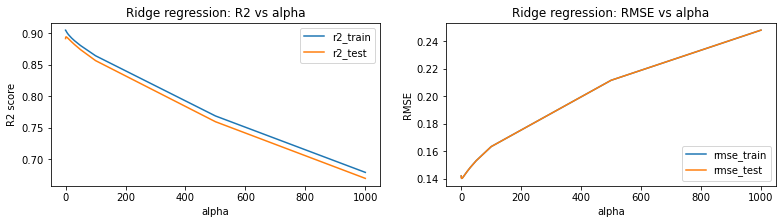

In [65]:
# Plot metrics (MSE and R2) vs alpha
plt.figure(figsize=(13,3))
plt.subplot(121)
plt.plot(metric_df.alpha, metric_df.ridge_r2_train)
plt.plot(metric_df.alpha, metric_df.ridge_r2_test)
plt.title('Ridge regression: R2 vs alpha')
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.legend(['r2_train', 'r2_test'], loc='upper right')
plt.subplot(122)
plt.plot(metric_df.alpha, metric_df.ridge_rmse_test)
plt.plot(metric_df.alpha, metric_df.ridge_rmse_test)
plt.title('Ridge regression: RMSE vs alpha')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.legend(['rmse_train', 'rmse_test'], loc='lower right')
plt.show()

**Observations:** As the value of alpha increases,
- R2 decreases
- RMSE increases

In [66]:
# Build a final ridge regression model with alpha 1
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

print('R2:Train =', r2_score(y_train, y_train_pred))
print('RMSE:Train =', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('R2:Test =', r2_score(y_test, y_test_pred))
print('RMSE:Test =', np.sqrt(mean_squared_error(y_test, y_test_pred)))
printmd('For an alpha value of 1, the ridge regression model performs well enough for both train and test datasets')

R2:Train = 0.9045182515994001
RMSE:Train = 0.1206468264357067
R2:Test = 0.894327646473046
RMSE:Test = 0.14042752462818758


**Observations:** For an alpha value of 1, the ridge regression model performs well enough for both train and test datasets

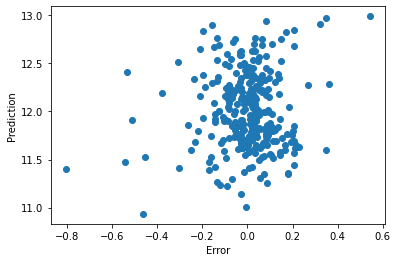

In [67]:
# Test for assumptions
y_test_pred = ridge_model.predict(X_test)
res = y_test - y_test_pred
plt.scatter(res, y_test_pred)
plt.xlabel('Error')
plt.ylabel('Prediction')
plt.show()

**Observations:** No visible patterns in error terms. Error terms are independent of each other.

#### Building a Lasso regression model

In [68]:
lambdas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
           1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 50, 100, 500, 1000]
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []
for lmda in lambdas:
    lasso_model = Lasso(alpha=lmda)
    lasso_model.fit(X_train, y_train)
    y_train_pred = lasso_model.predict(X_train)
    y_test_pred = lasso_model.predict(X_test)
    r2_train.append(r2_score(y_train, y_train_pred))
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    r2_test.append(r2_score(y_test, y_test_pred))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

In [69]:
# Adding MSE and R2 metrics for lasso to the metric dataframe.
metric_df['lasso_r2_train'] = r2_train
metric_df['lasso_r2_test'] = r2_test
metric_df['lasso_rmse_train'] = rmse_train
metric_df['lasso_rmse_test'] = rmse_test
metric_df

,alpha,ridge_r2_train,ridge_r2_test,ridge_rmse_train,ridge_rmse_test,lasso_r2_train,lasso_r2_test,lasso_rmse_train,lasso_rmse_test
0,0.0001,0.905249,0.891881,0.120184,0.142044,0.904026,0.895961,0.120957,0.139338
1,0.0010,0.905249,0.891887,0.120184,0.142040,0.890748,0.886079,0.129054,0.145805
2,0.0100,0.905249,0.891951,0.120184,0.141998,0.833231,0.824794,0.159446,0.180820
3,0.0500,0.905244,0.892210,0.120188,0.141828,0.448119,0.433325,0.290054,0.325191
4,0.1000,0.905229,0.892489,0.120197,0.141644,0.003699,-0.002120,0.389718,0.432446
5,0.2000,0.905181,0.892934,0.120227,0.141351,0.000000,-0.005837,0.390441,0.433247
6,0.3000,0.905117,0.893272,0.120268,0.141127,0.000000,-0.005837,0.390441,0.433247
7,0.4000,0.905043,0.893537,0.120315,0.140952,0.000000,-0.005837,0.390441,0.433247
8,0.5000,0.904962,0.893747,0.120366,0.140813,0.000000,-0.005837,0.390441,0.433247
9,0.6000,0.904877,0.893916,0.120420,0.140701,0.000000,-0.005837,0.390441,0.433247


**Observations:** It's clear from the metric dataframe that for lasso regression, when the value of alpha is 0.0001, the model performs well enough for both train and test datasets.

In [70]:
# Build a final lasso regression model with alpha 0.0001
lasso_model = Lasso(alpha=0.0001)
lasso_model.fit(X_train, y_train)
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

print('R2:Train =', r2_score(y_train, y_train_pred))
print('RMSE:Train =', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('R2:Test =', r2_score(y_test, y_test_pred))
print('RMSE:Test =', np.sqrt(mean_squared_error(y_test, y_test_pred)))
printmd('For an alpha value of 0.0001, the lasso regression model performs well enough for both train and test datasets')

R2:Train = 0.9040264738720347
RMSE:Train = 0.12095712250147439
R2:Test = 0.8959614990435434
RMSE:Test = 0.13933768584529224


**Observations:** For an alpha value of 0.0001, the lasso regression model performs well enough for both train and test datasets

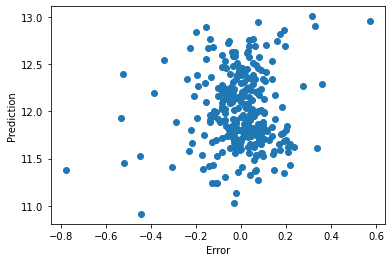

In [71]:
# Test for assumptions
y_test_pred = lasso_model.predict(X_test)
plt.scatter(y_test - y_test_pred, y_test_pred)
plt.xlabel('Error')
plt.ylabel('Prediction')
plt.show()

**Observations:** No visible patterns in error terms. Error terms are independent of each other.

In [72]:
# Check the co-efficients for all 3 regression models
coeff_df = pd.DataFrame(columns=['Linear', 'Ridge', 'Lasso'], index=X_test.columns)
coeff_df['Linear'] = lr.coef_
coeff_df['Ridge'] = ridge_model.coef_
coeff_df['Lasso'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
coeff_df

,Linear,Ridge,Lasso
MSSubClass,-6.428765e-02,-0.048430,-0.007735
LotFrontage,2.157057e-02,0.022249,0.022116
LotArea,1.116720e-01,0.105308,0.103925
OverallQual,1.732664e-01,0.169394,0.171804
OverallCond,2.254240e-01,0.216646,0.220963
MasVnrArea,2.535316e-02,0.028358,0.025068
ExterQual,-5.149970e-03,0.002068,-0.000000
ExterCond,-1.842830e-03,-0.000113,0.000000
BsmtQual,1.440583e-02,0.023407,0.006867
BsmtCond,2.754400e-02,0.029633,0.027251


**Observations:** Ridge regression has pushed the least important coefficients near to zero, whereas lasso regression has pushed the least important coefficients to zero.

In [73]:
np.abs(coeff_df.Lasso).sort_values(ascending=False).head(10)

GrLivArea               0.337291
TotalBsmtSF             0.306517
MSZoning_C (all)        0.225041
OverallCond             0.220963
Age                     0.207482
Exterior1st_BrkComm     0.201005
OverallQual             0.171804
SaleCondition_Alloca    0.144815
LotShape_IR3            0.136674
GarageCars              0.136577
Name: Lasso, dtype: float64

### Conclusion:
- Regularized models (ridge and lasso) performs far better than the linear regression model with R2 scores 89% approx for both train and test datasets.
- The hyperparameter (alpha) for ridge and lasso models are 1 and 0.0001 respectively.
- Ridge and Lasso models are more generalizable and robust when compared to linear regression model since there is no much difference between the R2 scores of both train and the test data.
- Lasso has reduced the complexity of the model by pushing the coefficients of few of the predictors to zero.
- Since scaling is done on the data before building a model, the coefficients can be compared for it's importance.
- Few of the important predictors include - `GrLivArea`, `TotalBsmtSF`, `OverallCond`, `Age`, `OverallQual` among others.
- The target variable `SalePrice` is log transformed before building a model. To get the actual value from the model predictions, take an inverse log/ exponential.

In [74]:
# Using lasso model for final predictions on test set. I'm using lasso over ridge because, on the test set lasso has 
# slightly better performance when compared to ridge and the model complexity is less in lasso model.

y_final_test_pred = lasso_model.predict(testing.drop('Id', axis=1))
testing['SalePrice'] = np.exp(y_final_test_pred)

In [75]:
submission = testing[['Id', 'SalePrice']]

In [76]:
submission.head()

,Id,SalePrice
0,1461,114671.999036
1,1462,152310.380848
2,1463,199773.717262
3,1464,191044.938388
4,1465,158335.474296


In [78]:
# Create a submission file
submission.to_csv('salepricesubmission.csv', index=False)